### 신경망, neural network는 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습할 수 있다

In [2]:
from IPython.display import Image

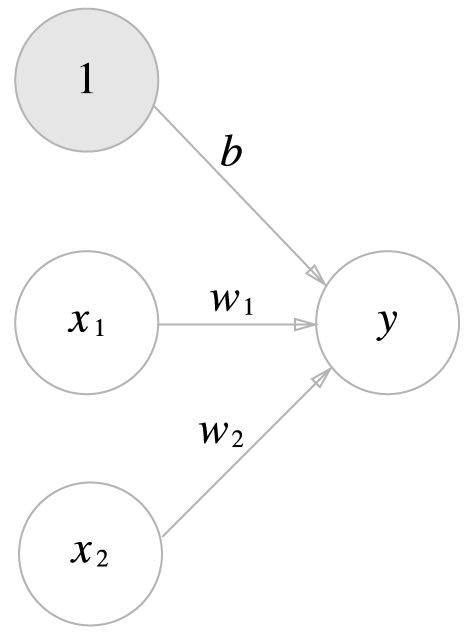

In [13]:
Image("1.png")

### b, 편향은 뉴런이 얼마나 쉽게 활성화 되느냐를 제어한다

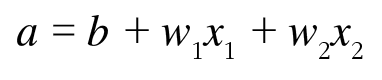

In [14]:
Image("2.png")

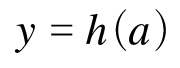

In [15]:
Image("3.png")

# 활성화 함수 : h(a)처럼 입력신호의 총합을 출력신호로 변환하는 함수

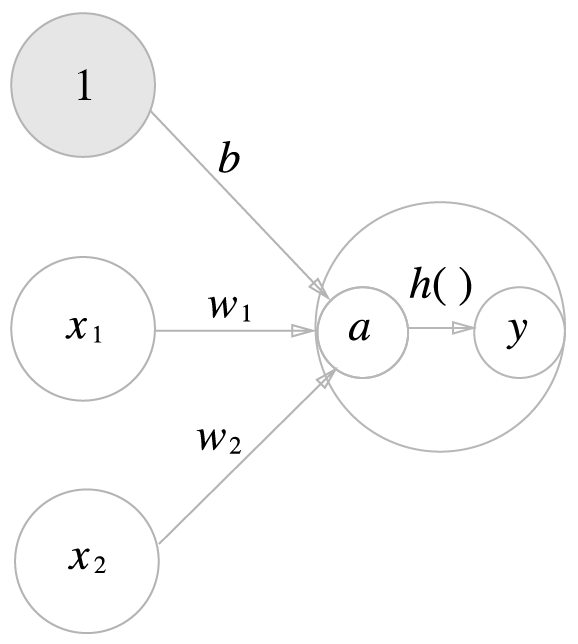

In [16]:
Image("4.png")

활성화 함수를 무엇으로 할 것이냐?   
   
1. 계단함수   
   임계값(0)을 경계로 출력이 바뀐다
   
   
2. 시그모이드 함수   
   
   
3. Relu 함수   
   
   **계단함수와 시그모이드 함수 둘 다 비선형함수다**

단순 퍼셉트론 : 일반적으로 단층 퍼셉트론에 계단함수를 활성화 함수로 사용한 모델을 가리킨다   
   
다층 퍼셉트론 : 신경망(시그모이드 함수를 사용한) 모델을 가리킨다   
   
   

### 신경망에서 활성화함수로 비선형 함수를 써야 하는 이유

선형함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다

완전연결 계층에 의한 변환은 '선형변환'이다.   
여기에 비선형 효과를 부여하는게 활성화함수다 = 더 정확히 말하면 활성화 함수를 사용해 신경망의 표현력을 높인다

# 0. 계단 함수

In [29]:
import numpy as np
import matplotlib.pylab as plt

In [31]:
def step_func(x):                          #  입력값으로 넘파이 배열을 받고
    y = x > 0                              # 넘파이 배열에 부등호 연산을 수행하면 배열 원소 각각에 부등호 연산을 수행한 bool배열이 생성된다. 
    print(y)
    return y.astype(np.int)                # astype()을 써서 bool값을 int로 바꿔준다

x = np.array([-1.0, 1.0, 2.0])
step_func(x)

[False  True  True]


array([0, 1, 1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


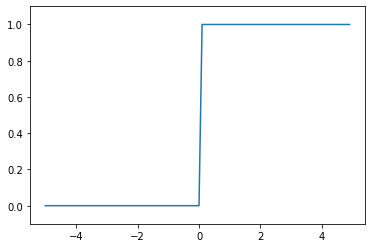

In [28]:



def step_function(x):                     # 실수를 입력 받아서
    return np.array(x > 0, dtype=np.int)  # bool 값을 int로 바꾸면 True는 1로, False는 0으로 바뀐다. 

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
print(Y)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

# 1. 시그모이드 함수 구현하기

In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np.exp(-x)는 exp**(-x)와 같다.
                    # 넘파이 배열을 받아도 올바른 결과가 나오게 된다
                    # 넘파이의 브로드캐스트 기능때문이다.
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)      

array([0.26894142, 0.73105858, 0.88079708])

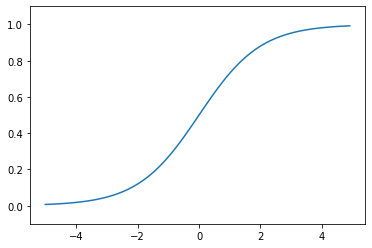

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# 2. ReLU 함수

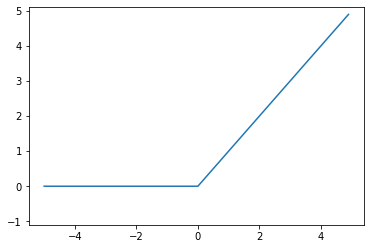

In [34]:
def relu(x):
    return np.maximum(0, x) # np.maximum(a,b) a, b중 큰 값을 선택해 반환

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

# 3. 다차원 배열

### 1차원 배열 예시

In [89]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) # 배열의 차원의 갯수를 알려줌
print(A.shape)    # shape을 찍으면 튜플로 반환된다는 점 주의
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [81]:
A = np.array([1, 2, 3, 4])
B = A.reshape(1,4)
B

array([[1, 2, 3, 4]])

In [82]:
print(B.shape)
print(B.ndim)

(1, 4)
2


### 2차원 배열 예시

In [90]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


# 4. 행렬곱과 원소별곱 차이

In [76]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B) # A*B와는 다름
             # 행렬곱 연산

array([[19, 22],
       [43, 50]])

In [77]:
A*B  # element-wise 곱

array([[ 5, 12],
       [21, 32]])

# 5. 1차원 배열과 다차원 배열의 곱

### 다차원 X 1차원 (열벡터 취급)

In [88]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)

B = np.array([7, 8])  
print(B.shape)
print(B.ndim)

np.dot(A,B)

(3, 2)
(2,)
1


array([23, 53, 83])

### 1차원 X 다차원 (행벡터 취급)

In [92]:
X = np.array([1,2])
print(X.shape)
print(X.ndim)

W = np.array([[1,3,5], [2,4,6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
1
(2, 3)
[ 5 11 17]


# 넘파이 배열과 신경망(뉴런)의 관계

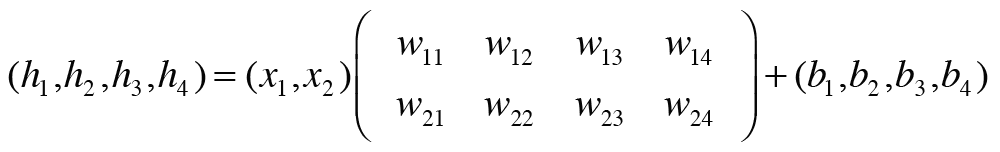

In [3]:
Image("11.png")

하나의 입력 데이터의 차원이 2개 > 은닉층에서 4개로 바뀌었다 >>> 2차원이 4차원으로   
즉 뉴런 개수가 의미하는 건 데이터의 바뀐 차원 수다. (데이터 하나의 차원수)

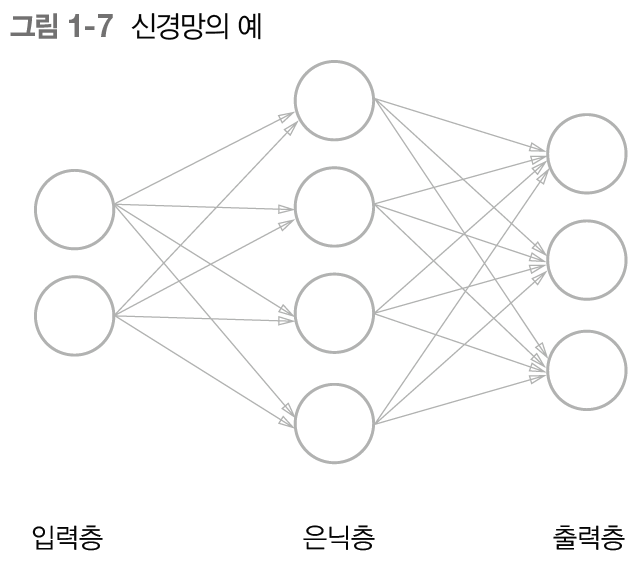

In [5]:
Image("12.png")

아래 배치처리를 위 신경망 이미지로 나타낸다면   
위 그림이 N개 만큼 필요해 질 것이다

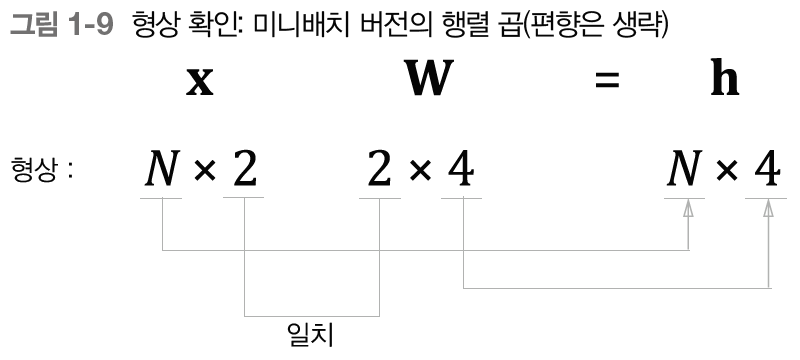

In [6]:
Image("13.png")

# 6. 3층 신경망 구현하기

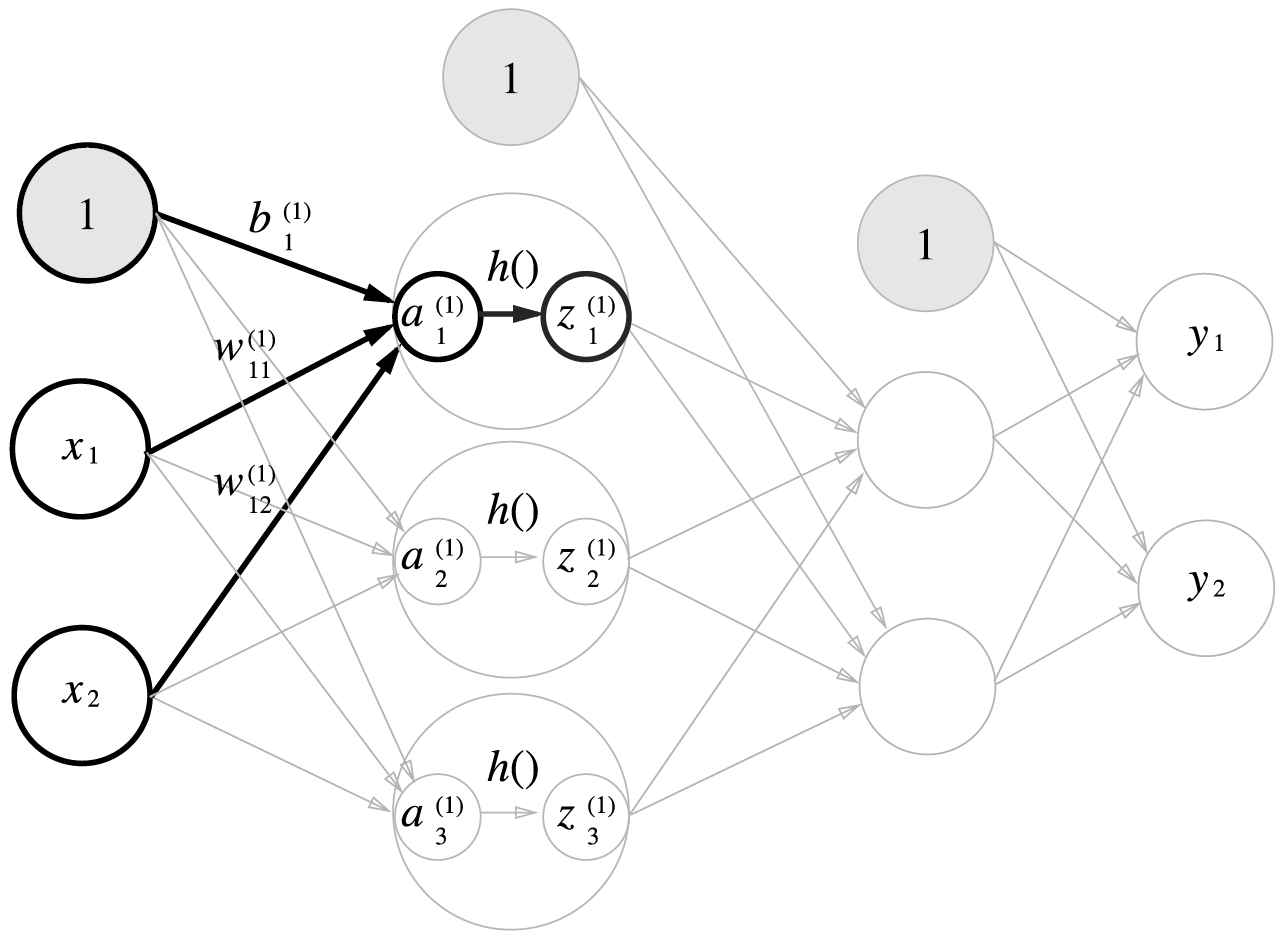

In [93]:
Image("5.png")

### 입력값 2개를 3개의 출력값으로 바꾸고 싶으면 가중치 행렬의 shape은 몇이어야 할까?

In [94]:
#입력층에서 1층으로의 신호 전달
X = np.array([1.0, 0.5]) #(1,2)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #(2,3)
B1 = np.array([0.1, 0.2, 0.3]) #(1,3)

A1 = np.dot(X, W1) + B1 #(1,3)
print(A1)

[0.3 0.7 1.1]


In [95]:
# 활성화 함수로 시그모이드 함수를 사용하기로 했을 때
Z1 = sigmoid(A1) #(1,3)
print(Z1)

[0.57444252 0.66818777 0.75026011]


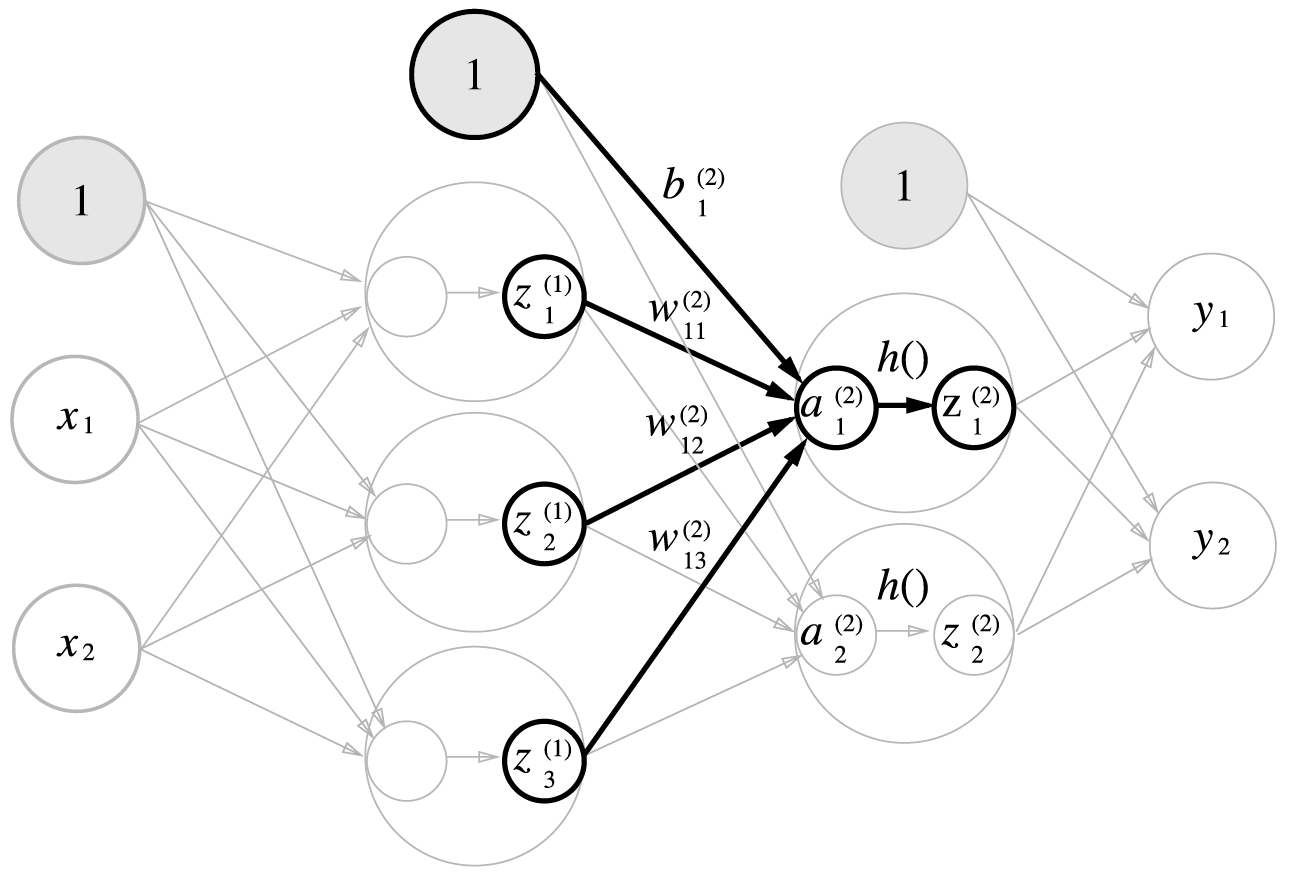

In [96]:
Image("6.png")

### 출력값 3개를 다시 2개의 출력값으로 바꾸고 싶으면 가중치 행렬의 shape은 몇이어야 할까?

In [98]:
#1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #(3,2)
B2 = np.array([0.1, 0.2]) #(1,2)

A2 = np.dot(Z1, W2) + B2 #(1,2)
Z2 = sigmoid(A2) #(1,2)
Z2

array([0.62624937, 0.7710107 ])

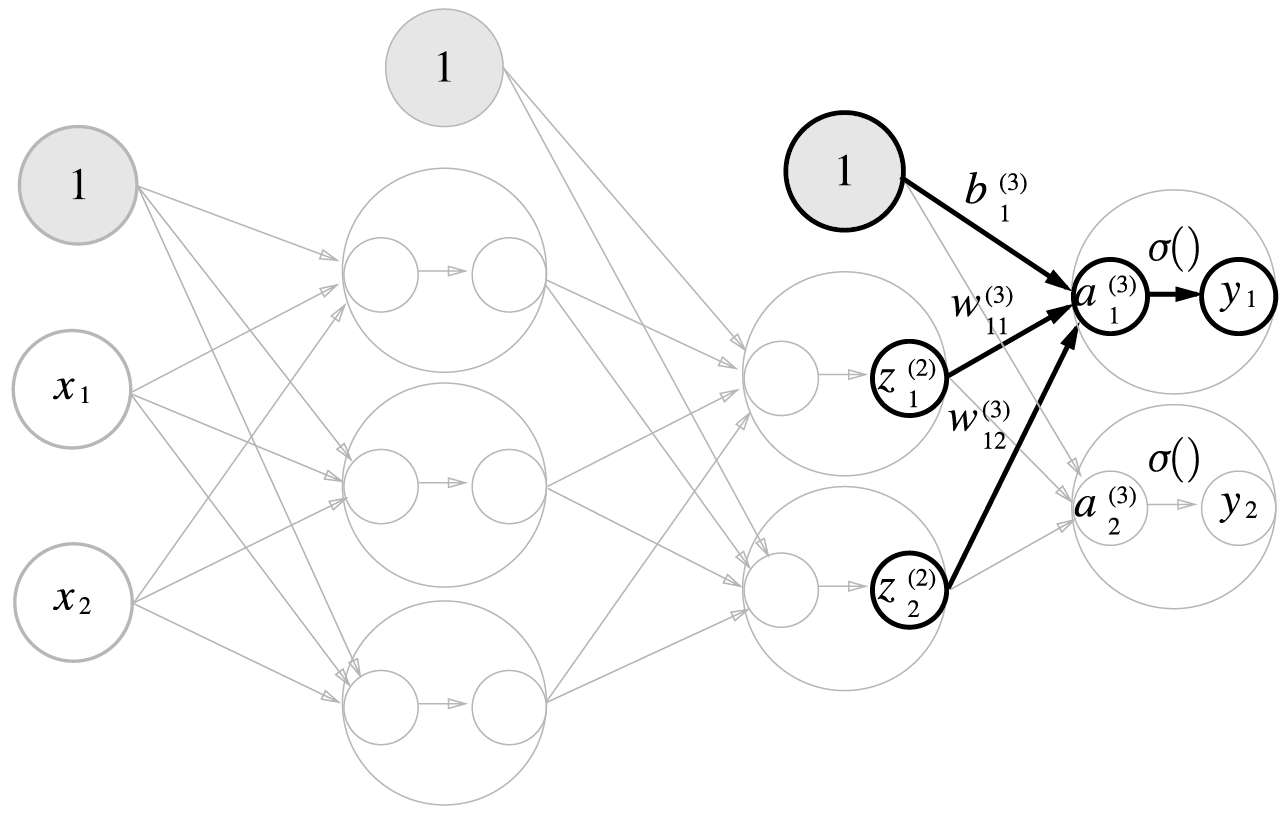

In [99]:
Image("7.png")

### 출력값 2개를 최종 출력값 2개로 내보내기 위해선 가중치 행렬의 shape이 몇이어야 할까?

In [100]:
# 2층에서 출력층으로의 신호 전달
# 출력층의 활성화 함수를 identity_function 항등함수로 정의

# 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다
# 회귀 : 항등
# 이진 분류 : 시그모이드
# 다중 분류 : 소프트맥스

def identity_function(x):
      return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) #2*2
B3 = np.array([0.1, 0.2]) #1*2

A3 = np.dot(Z2, W3) + B3 #1*2
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

# 7. 구현 정리

In [45]:
import numpy as np
def init_network():
    network = {}                                                    # 딕셔너리에 가중치 담아서, 신경망 구현 관례에 따라 가중치는 대문자로.
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2개의 입력값을 3개로 바꾸려면  2 x 3
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3개의 입력값을 2개로 다시 바꾸려면 2 X 2
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']        # 언팩킹
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1                                         # 신경망 쌓기  forward pass(순전파) 
    z1 = sigmoid(a1)                                                # 넘파이 메서드 사용 
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])                                           # 입력값 x 선언 
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 8. 소프트맥스 함수

신경망의 마지막 출력층에서 쓰는 활성화 함수

In [2]:
import numpy as np

In [12]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a  # 입력신호의 지수함수 / 모든 입력신호의 지수함수의 합
    
    return y               # 소프트맥스의 출력은 0부터 1 사이의 실수다
                           # 그래서 출력 결과를 확률로 해석할 수 있다

In [4]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 오버플로 대책

In [7]:
a = np.array([10, 20, 30])
softmax(a)

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [10]:
c = np.max(a)
b = a - c
print(b)
softmax(b)                # 입력값 중 최대값을 각 입력값에서 뺀 걸 소프트맥스에 넣어도 결과는 똑같다

[-20 -10   0]


array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [14]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [15]:
np.sum(y)

1.0

# 9. 손글씨 숫자 인식

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(len(x_train), len(x_test))
print(x_train.shape)

img = x_train[0]

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

label = t_train[0]
print(label)  # 5



img_show(img)

60000 10000
(60000, 784)
(784,)
(28, 28)
5


In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
                                                              # normalize : 입력 이미지의 픽셀값을 0.0 ~ 1.0 사이 값으로 정규화
                                                              # flatten : False로 하면 원래 3차원 배열 1 x 28 x 28 로
                                                              # one_hot_label : True로 하면 레이블을 원핫 인코딩하여 저장 
                
#     (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
#     t_test[0]
#     7
                
#     (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)
#     t_test[0]
#     array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
    
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):                                                # forward 함수와 같다
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()                # 테스트 데이터, 레이블 
print("테스트 데이터셋 사이즈 : ", len(x))
print("테스트 데이터 하나의 길이 : ", len(x[0]))

network = init_network()         # 훈련 완료된 가중치 

print("학습 완료된 가중치 : ", network.keys())

print("W1 행 : ", len(network['W1']))
print("W1 열 : ", len(network['W1'][0]))   # 첫번째 은닉층에 50개 뉴런 (784차원을 50차원으로 압축)
print("W1의 첫번째 뉴런 : ", network['W1'][0])

print("W2 행 : ", len(network['W2']))
print("W2 열 : ", len(network['W2'][0]))   # 첫번째 은닉층에 100개 뉴런 (50차원을 100차원으로 확장)
print("W2의 첫번째 뉴런 : ", network['W2'][0])

print("W3 행 : ", len(network['W3']))
print("W3 열 : ", len(network['W3'][0]))   # 첫번째 은닉층에 10개 뉴런 (50차원을 10차원으로 압축)
print("W3의 첫번째 뉴런 : ", network['W3'][0])

y = predict(network, x[0])
print("첫번째 테스트 이미지의 소프트맥스 출력값 : ", y)

p = np.argmax(y)                                            # np.argmax()  배열의 원소 중 최대값의 인덱스를 반환한다. 
print("모델이 예측한 첫번째 테스트 이미지의 숫자 : ", p)

print("첫번째 테스트 이미지의 정답 레이블 : ", t[0])

print("예측값과 정답 레이블 비교 : ", p==t[0])

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])  # flattened 테스트 이미지들을 학습 완료된 신경망에 순서대로 하나씩 넣는다.  
                                # 0부터 9까지 숫자에 테스트 이미지의 숫자가 
                                # 각각 몇 퍼센트 확률로 부합하는지 알려주는 소프트맥스 출력값 10개가 생성된다
    
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

테스트 데이터셋 사이즈 :  10000
테스트 데이터 하나의 길이 :  784
학습 완료된 가중치 :  dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
W1 행 :  784
W1 열 :  50
W1의 첫번째 뉴런 :  [-0.00741249 -0.00790439 -0.01307499  0.01852573 -0.00153461 -0.00876485
 -0.02929461 -0.02101859 -0.01490408 -0.00563215 -0.00669386 -0.09532019
  0.02302948  0.00116916  0.04227314  0.00876646  0.02783365 -0.03575159
  0.01493105 -0.00444681 -0.01983534 -0.00654568  0.05530919  0.0602967
  0.04177547 -0.01497498 -0.01285678  0.01684514 -0.01641353  0.03349771
  0.01523217  0.03068517 -0.019785    0.01470414 -0.02748215  0.0103357
  0.00324177  0.01369166  0.04739346 -0.00776699  0.01009176 -0.03811338
 -0.03022793 -0.00554773  0.06369497  0.0315716   0.06316955  0.01978721
 -0.04331266 -0.01350104]
W2 행 :  50
W2 열 :  100
W2의 첫번째 뉴런 :  [-0.10694039  0.01591247 -0.44349867 -0.14730054  0.11094789 -0.2672258
 -0.09675636 -0.38117746 -0.07694907  0.4296536  -0.05018765 -0.11847687
  0.09418261  0.30181602  0.19666518  0.05942965  0.5290536   0.151

### 데이터 백색화 (whitening) : 전체데이터를 균일하게 분포시키는 것

# 10. 배치처리

### 다수의 샘플 데이터를 한꺼번에 처리하는 것 >>> 배치처리   
### 미니배치 학습 >>> 전체 데이터를 작은 그룹으로 나눠 그룹단위로 반복학습하는 방식

In [ ]:
# 위 구현은 이미지 데이터를 1장만 입력했을 때의 모델이다.
# 위 모델의 데이터 처리 흐름은 784 -> 50 -> 100 -> 10  이다. 

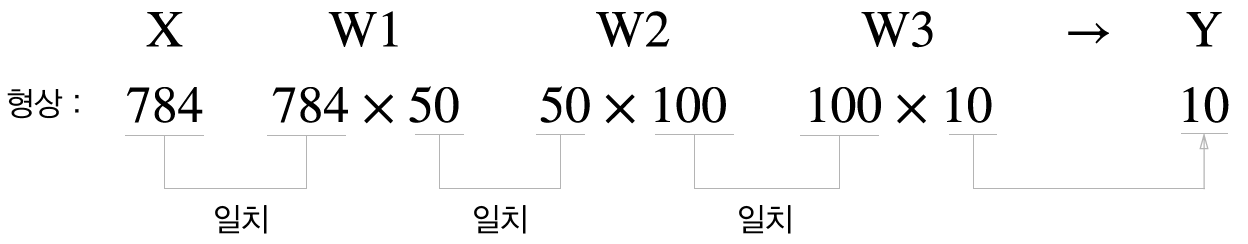

In [23]:
Image("8.png")

In [ ]:
# 이미지 100장을 배치처리(병렬처리)하려면 어떻게 해야 할까? 

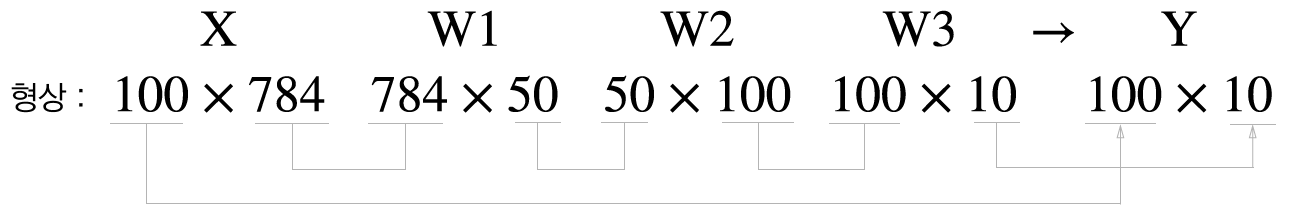

In [24]:
Image("9.png")

In [ ]:
# 데이터 입력 형상은 100 x 784
# 최종 출력 형상은 100 x 10   이 된다. 

In [30]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # 0부터 9999까지 10000개를 100묶음씩 끊어서 원래 10000번 돌던 걸 100번만 돌리게 하고 
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)  # 이미지 100장씩 inference 함수에 넣어 100 묶음의 소프트맥스 출력값 배열을 생성한 뒤 
    p = np.argmax(y_batch, axis=1)       # 모델의 예측값(최대 스코어를 받은 인덱스)도 100개씩 묶어서 
                                          # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
    accuracy_cnt += np.sum(p == t[i:i+batch_size])  # 정답레이블과 예측값도 100개씩 비교해 accuracy를 계산
                                                    # 예측값과 레이블이 같은 것만 더해서 카운트

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [38]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
             [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)
print(x.shape)
y = np.argmax(x, axis=1) # axis = 1 이라고 했으니까 x의 각 행에서 최대 원소의 인덱스를 반환
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
(4, 3)
[1 2 1 0]


In [37]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
             [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)
print(x.shape)
y = np.argmax(x, axis=0) # axis = 0 이라고 했으니까 x의 각 열에서 원소의 인덱스를 반환
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
(4, 3)
[3 0 1]


In [41]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
             [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)
print(x.shape)
y = np.argmax(x) 
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
(4, 3)
1


In [30]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [31]:
np.sum(y==t)

3

In [1]:
import numpy as np

In [2]:
x = np.array([[1, 2, 3,], [4, 5, 6],
            [5, 6, 7], [6, 7, 8]])

In [3]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8]])

In [5]:
y = np.argmax(x, axis=1)   # 넘파이메서드  rank, dimension, axis, shape   # 2차원 배열에서 axis = 0 은 열방향, axis =1 행방향
y

array([2, 2, 2, 2])

In [6]:
y = np.argmax(x, axis=0)
y

array([3, 3, 3])

In [7]:
x.ndim

2

In [3]:
with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)


In [4]:
network

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [5]:
type(network)

dict

In [6]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])